# Loading Dataset

In [1]:
import pandas as pd
import os
from pathlib import Path

cwd = os.getcwd()

In [2]:
dataset = pd.read_csv(Path(cwd, 'heart.csv'))
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(dataset.shape)

(303, 14)


In [4]:
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Exploration

In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Split the data into features (X) and target (y) label sets

In [6]:
dataset["age_scaled"] = (dataset["age"] - dataset["age"].mean()) / (dataset["age"].std())
dataset.drop(columns=["age"], inplace=True)

In [7]:
dataset["age_scaled"].head()

0    0.950624
1   -1.912150
2   -1.471723
3    0.179877
4    0.289984
Name: age_scaled, dtype: float64

In [8]:
features = [col for col in dataset.columns if col!= 'target']
print(features)
X = pd.DataFrame(dataset[features])
y = pd.DataFrame(dataset['target'])

['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_scaled']


# Split the data into a training and test set

In [9]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [10]:
y_train.head()

,target
49,1
171,0
223,0
58,1
154,1


# Create and Train the Model

In [11]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/mnt/c/Users/abhis/.pyenv/versions/3.10.1/envs/intellipaat_ds/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/abhis/.pyenv/versions/3.10.1/envs/intellipaat_ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

# Predicting the test set results

In [13]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0])

In [14]:
logmodel.classes_

array([0, 1])

In [15]:
logmodel.coef_

array([[-1.49889258,  0.82486907, -0.01615723, -0.00578043, -0.09891295,
         0.19878362,  0.03156581, -0.81994346, -0.31598944,  0.76920634,
        -0.77321486, -0.31073267,  0.00274753]])

In [16]:
y_prob = logmodel.predict_proba(X_test)

y_pred_dict = {"Class 1":0, "Class 0": 0}

for y in y_prob:
    if y[0] >= 0.5:
        y_pred_dict["Class 0"] += 1
    else:
        y_pred_dict["Class 1"] += 1
        
        
print(y_pred_dict)

{'Class 1': 55, 'Class 0': 36}


In [17]:
y_prob

array([[0.94508002, 0.05491998],
       [0.36048377, 0.63951623],
       [0.68817631, 0.31182369],
       [0.23391153, 0.76608847],
       [0.89973939, 0.10026061],
       [0.25875364, 0.74124636],
       [0.19432505, 0.80567495],
       [0.27054058, 0.72945942],
       [0.12070362, 0.87929638],
       [0.89880594, 0.10119406],
       [0.03184548, 0.96815452],
       [0.94494724, 0.05505276],
       [0.31904754, 0.68095246],
       [0.38541461, 0.61458539],
       [0.89349967, 0.10650033],
       [0.48322134, 0.51677866],
       [0.98854357, 0.01145643],
       [0.99075992, 0.00924008],
       [0.05739529, 0.94260471],
       [0.8810829 , 0.1189171 ],
       [0.96484702, 0.03515298],
       [0.11420108, 0.88579892],
       [0.28981641, 0.71018359],
       [0.05869541, 0.94130459],
       [0.91424141, 0.08575859],
       [0.94504051, 0.05495949],
       [0.98999251, 0.01000749],
       [0.8411614 , 0.1588386 ],
       [0.03087137, 0.96912863],
       [0.99003712, 0.00996288],
       [0.

In [18]:
cnt = 0

for i in y_pred:
    if i == 0:
        cnt+=1
cnt

36

In [19]:
pd.Series(y_pred)

0     0
1     1
2     0
3     1
4     0
     ..
86    1
87    1
88    1
89    1
90    0
Length: 91, dtype: int64

In [20]:
y_test

,target
246,0
183,0
229,0
126,1
184,0
...,...
69,1
21,1
210,0
78,1


# Calculating the accuracy

In [36]:
print('Test Accuracy: {}'.format((logmodel.score(X_test, y_test))))
print(logmodel.coef_)

Test Accuracy: 0.7802197802197802
[[-1.49889258  0.82486907 -0.01615723 -0.00578043 -0.09891295  0.19878362
   0.03156581 -0.81994346 -0.31598944  0.76920634 -0.77321486 -0.31073267
   0.00274753]]


In [37]:
print('Training Accuracy: {}'.format((logmodel.score(X_train, y_train))))
print(logmodel.coef_)

Training Accuracy: 0.8632075471698113
[[-1.49889258  0.82486907 -0.01615723 -0.00578043 -0.09891295  0.19878362
   0.03156581 -0.81994346 -0.31598944  0.76920634 -0.77321486 -0.31073267
   0.00274753]]


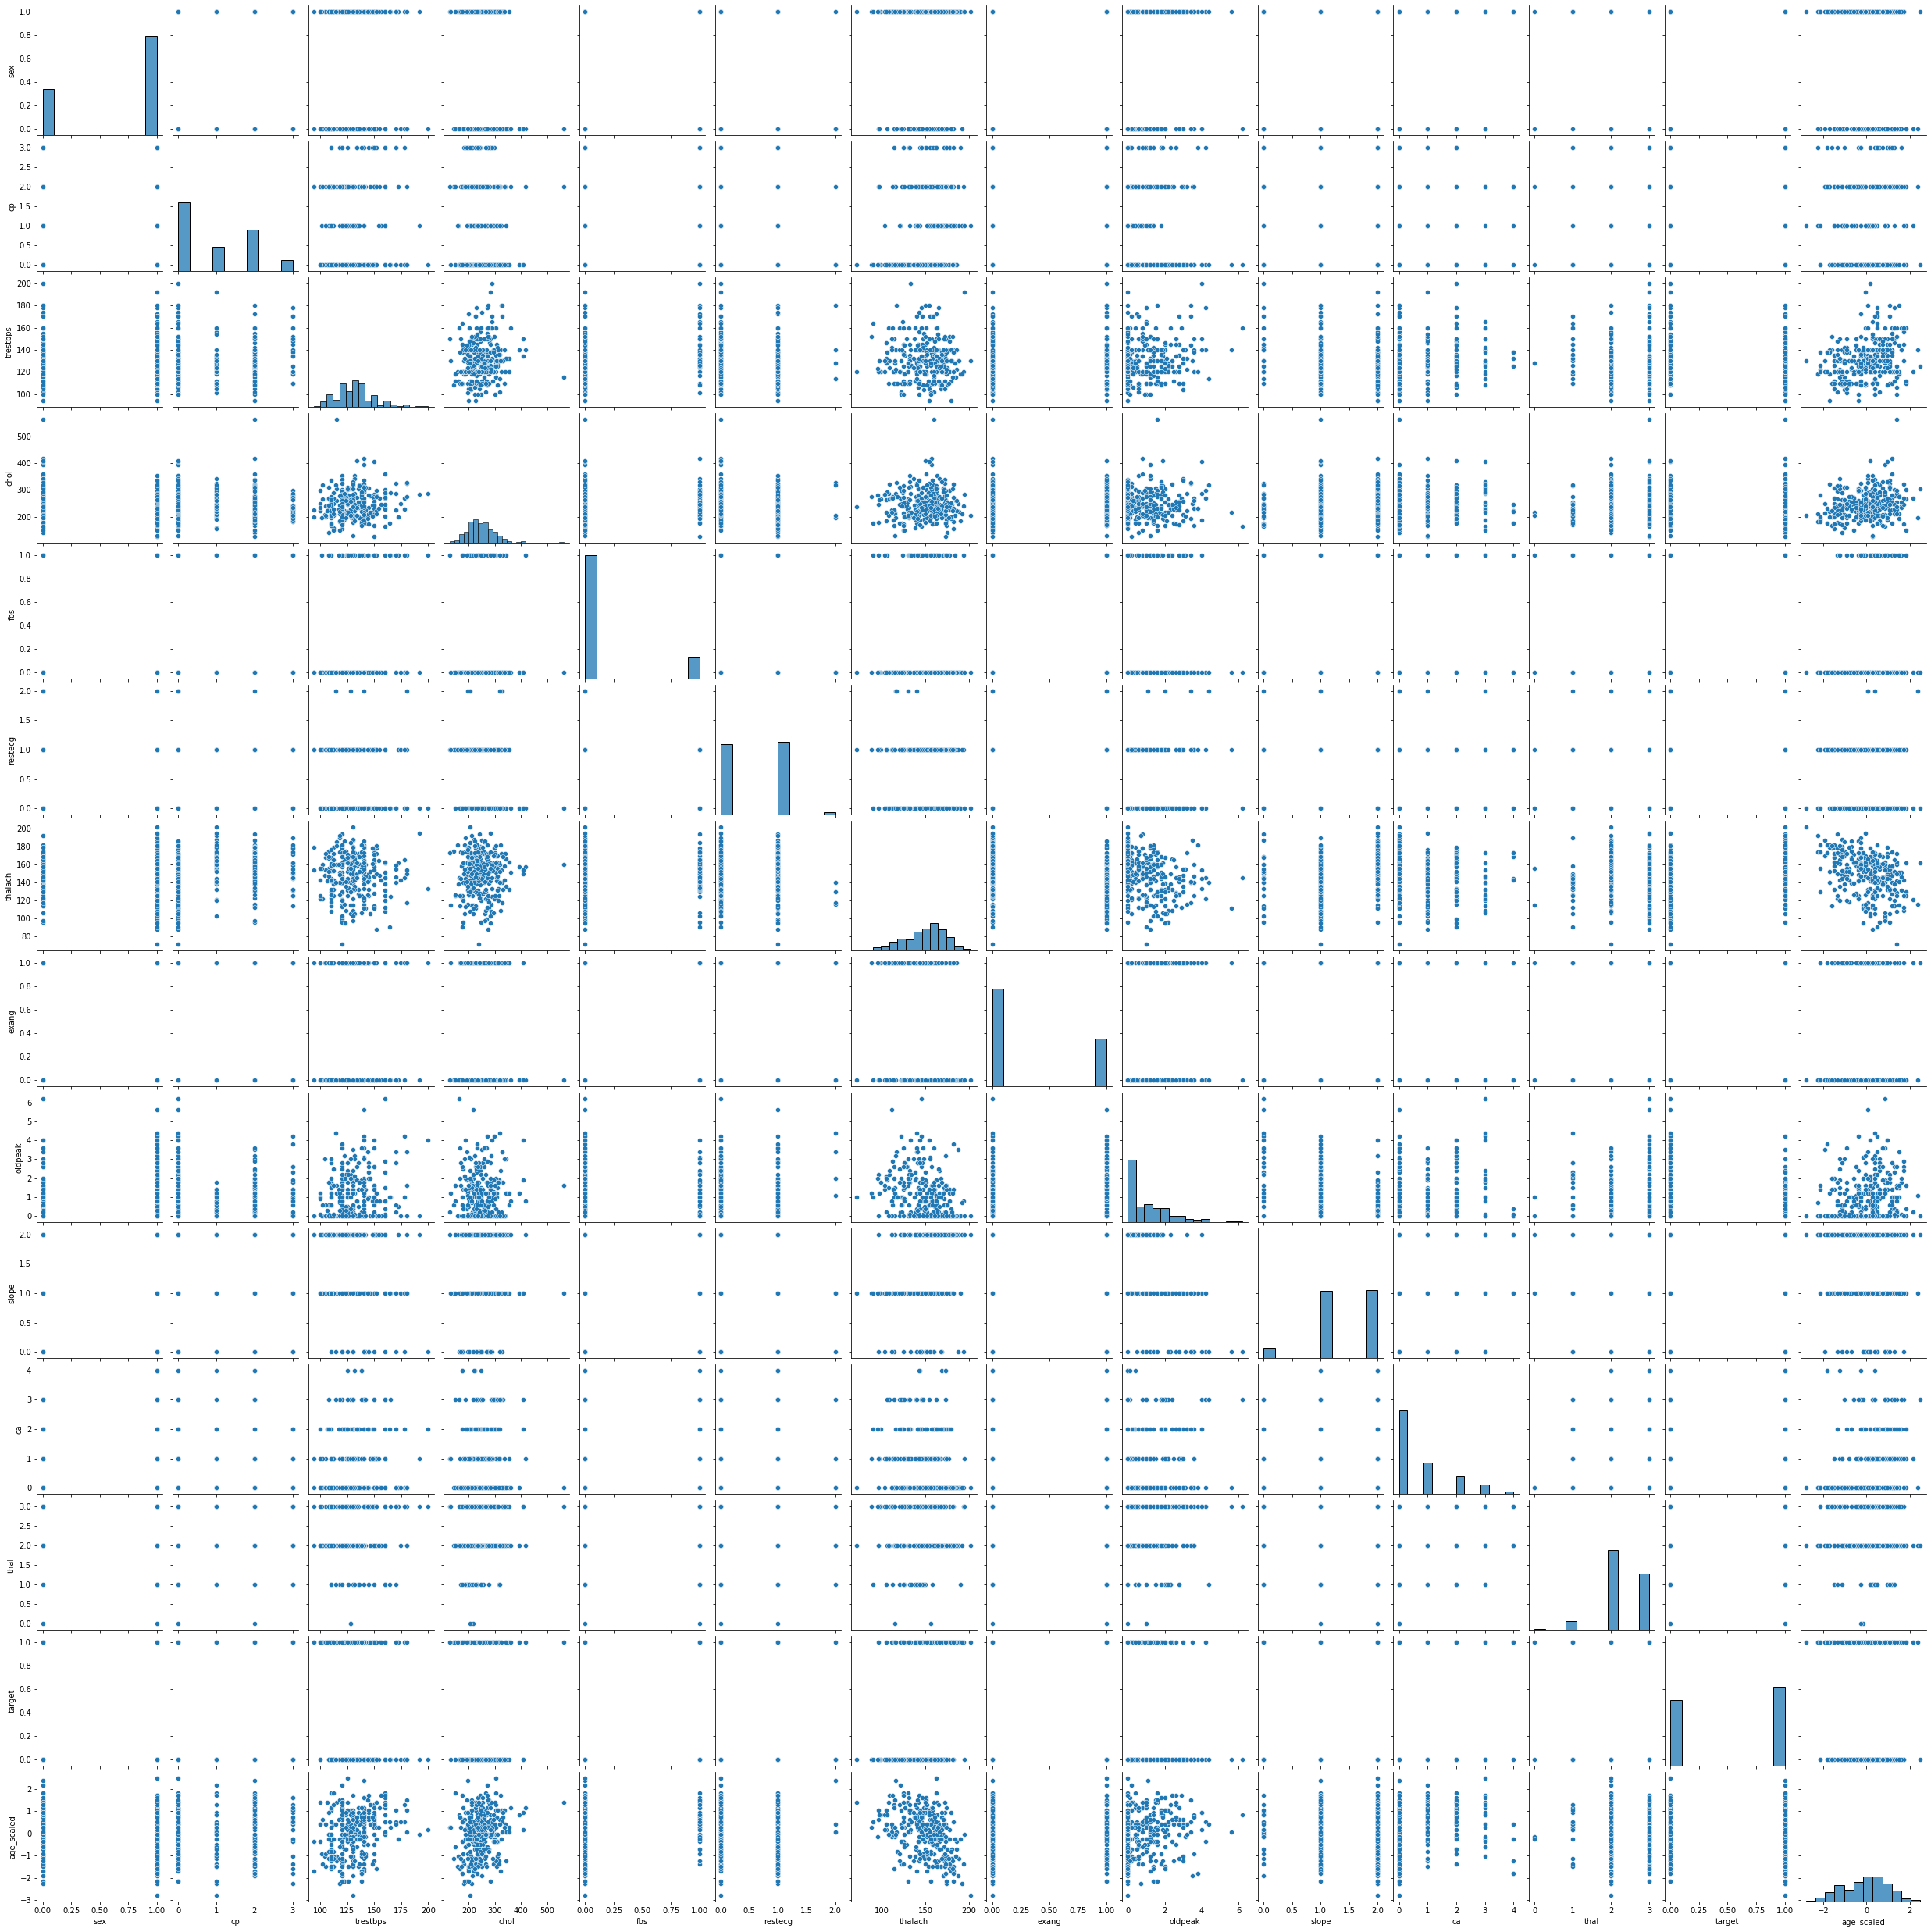

In [23]:
import seaborn as sns

sns.pairplot(dataset)

# Evaluate model using Confusion Matrix

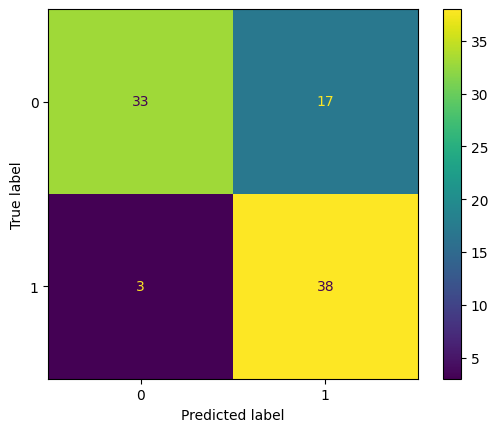

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=logmodel.classes_).plot()

In [25]:
tpm =tnm=fpm=fnm = 0

for (yt, yp) in zip(y_test.values.tolist(), y_pred):
    if yt[0] == 0 and yp == 0:
        tnm += 1
    elif yt[0] == 0 and yp == 1:
        fpm += 1
    elif yt[0] == 1 and yp == 1:
        tpm += 1
    elif yt[0] == 1 and yp == 0:
        fnm += 1
        
print(tpm, tnm, fpm, fnm)

38 33 17 3


In [26]:
y_test.values.tolist()[0]

[0]

In [27]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0])

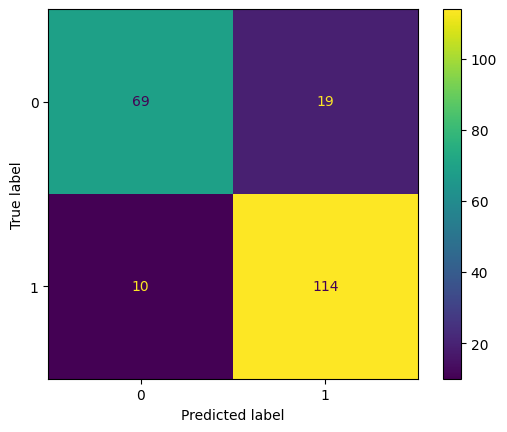

In [28]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, logmodel.predict(X_train)), display_labels=logmodel.classes_).plot()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77        50
           1       0.69      0.93      0.79        41

    accuracy                           0.78        91
   macro avg       0.80      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91



Judging from this we can say our classifier model was good enough with a 77% Accuracy.

Text(0.5, 0, 'False Positive Rate')

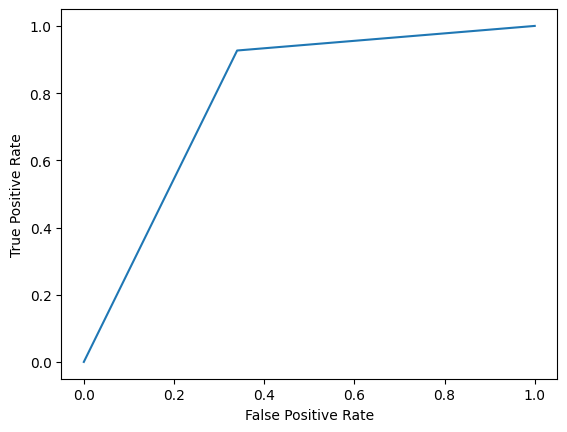

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [31]:
roc_auc_score(y_test, y_pred)

0.7934146341463414

In [32]:
confusion_matrix_test = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix_test.ravel()

specificity = fp / (tn + fp)

sensitivity = recall = tp / (tp + fn)

precision = tp / (tp+fp)

In [33]:
specificity, sensitivity, precision

(0.34, 0.926829268292683, 0.6909090909090909)

In [34]:
f1_score = 2*((precision * recall) / (precision + recall))

In [35]:
f1_score

0.7916666666666667